In [1]:
import pandas as pd
from hanziconv import HanziConv

import jieba
import jieba.posseg as pseg
import jieba.analyse

## test jieba

In [2]:
seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.188 seconds.
Prefix dict has been built succesfully.


他, 来到, 了, 网易, 杭研, 大厦


In [3]:
d = {'from':['user1','user2','user3','user4'],
     'text':[['我来到北京清华大学','怎麼了？你還好嗎'],
             ['一條一條讀進來','我今天很好','日本桌球天后福原愛去年嫁給台灣桌球王子江宏傑，成為台灣媳婦，她今天在臉書表示，台灣的朋友都對她很好、很熱情，但有一件很重要的事情要說一下，「我姓福原，名字是單名愛」，原來是在台灣常常遇到民眾把她的名字斷句斷錯地方，苦惱的她也強調「這不是搞笑，是真的啦」'],
             ['這不是搞笑，是真的啦!'],
             ['川普5日落腳日本，與安倍晉三會面時強調，日本是美國重要盟國，並向北韓示警，呼籲金正恩勿低估美國的決心。川普還將拜會天皇明仁夫婦，並與曾遭北韓綁架的受害者及家屬見面。']]
    }
df = pd.DataFrame(data=d)
df

,from,text
0,user1,"[我来到北京清华大学, 怎麼了？你還好嗎]"
1,user2,"[一條一條讀進來, 我今天很好, 日本桌球天后福原愛去年嫁給台灣桌球王子江宏傑，成為台灣媳婦..."
2,user3,[這不是搞笑，是真的啦!]
3,user4,[川普5日落腳日本，與安倍晉三會面時強調，日本是美國重要盟國，並向北韓示警，呼籲金正恩勿低估...


In [4]:
for i in range(len(df)):
    k = df.iloc[i,1]
    print('user '+str(i+1)+' text:\n')
#     print(k)
    if(len(k)>1):
        for j in range(len(k)):
            seg_list = jieba.cut(k[j])  # 默认是精确模式
            print(", ".join(seg_list))
    else:
        seg_list = jieba.cut(k[0])  # 默认是精确模式
        print(", ".join(seg_list))

user 1 text:

我, 来到, 北京, 清华大学
怎麼, 了, ？, 你, 還好, 嗎
user 2 text:

一條, 一條, 讀, 進來
我, 今天, 很, 好
日本, 桌球, 天, 后福, 原愛, 去年, 嫁給, 台灣, 桌球, 王子江, 宏傑, ，, 成為, 台灣, 媳婦, ，, 她, 今天, 在, 臉書, 表示, ，, 台灣, 的, 朋友, 都, 對, 她, 很, 好, 、, 很熱情, ，, 但, 有, 一件, 很, 重要, 的, 事情, 要, 說, 一下, ，, 「, 我姓, 福原, ，, 名字, 是, 單名, 愛, 」, ，, 原來, 是, 在, 台灣, 常常, 遇到, 民眾, 把, 她, 的, 名字, 斷句, 斷錯, 地方, ，, 苦惱, 的, 她, 也, 強調, 「, 這, 不是, 搞笑, ，, 是, 真的, 啦, 」
user 3 text:

這, 不是, 搞笑, ，, 是, 真的, 啦, !
user 4 text:

川普, 5, 日落, 腳, 日本, ，, 與, 安倍, 晉三會, 面時, 強調, ，, 日本, 是, 美國, 重要, 盟國, ，, 並向, 北韓, 示警, ，, 呼籲, 金正恩, 勿, 低估, 美國, 的, 決心, 。, 川普, 還將, 拜會, 天皇, 明仁, 夫婦, ，, 並與, 曾, 遭北, 韓綁, 架, 的, 受害者, 及家屬, 見面, 。


In [2]:
df = pd.read_csv('data/text.csv')

In [3]:
df.head()

,from,to,text,room,time
0,ud4097fbb4471c8c54512814bf0182e03,u84fa1e46e99df373e0f978c2ba274f9a,wd,8aee77a7-1d90-4d0f-b3c3-3f7b94a90e36,1.471640e+12
1,ud4097fbb4471c8c54512814bf0182e03,u96e826dccd3c9db56d684a5ddffc3154,嗨嗨,fe214cfc-22d1-4736-92e7-d133190142b8,1.471643e+12
2,u96e826dccd3c9db56d684a5ddffc3154,ud4097fbb4471c8c54512814bf0182e03,蛤？,fe214cfc-22d1-4736-92e7-d133190142b8,1.471643e+12
3,ud4097fbb4471c8c54512814bf0182e03,u96e826dccd3c9db56d684a5ddffc3154,你是第二個使用者ＱＱ,fe214cfc-22d1-4736-92e7-d133190142b8,1.471643e+12
4,u96e826dccd3c9db56d684a5ddffc3154,ud4097fbb4471c8c54512814bf0182e03,哈哈哈哈哈哈哈,fe214cfc-22d1-4736-92e7-d133190142b8,1.471643e+12


In [4]:
df_small = df.head(1000)
# df_small

## transform time

In [20]:
df_small['time'][0]

1471639945495.0

In [61]:
from datetime import datetime
datetime.fromtimestamp(1471639945495.0/1000.0)

datetime.datetime(2016, 8, 19, 20, 52, 25, 495000)

In [31]:
for i in range(len(df_small)):
    print(datetime.fromtimestamp(int(df_small['time'][i]/1000.0)).strftime('%Y-%m-%d %H:%M:%S'))


2016-08-19 20:52:25
2016-08-19 21:48:01
2016-08-19 21:48:03
2016-08-19 21:48:15
2016-08-19 21:48:23
2016-08-19 21:48:47
2016-08-19 21:48:51
2016-08-19 21:48:54
2016-08-19 21:48:54
2016-08-19 21:49:10
2016-08-19 21:49:11
2016-08-19 21:49:26
2016-08-19 21:49:38
2016-08-19 21:49:48
2016-08-19 21:49:51
2016-08-19 21:49:52
2016-08-19 21:50:01
2016-08-19 21:50:19
2016-08-19 21:50:28
2016-08-19 21:50:40


# jieba 

In [32]:
from hanziconv import HanziConv
HanziConv.toTraditional('我来到北京清华大学')

'我來到北京清華大學'

In [62]:
l =len(df_small)
# df_small['cut'] = p.Series(np.random.randn(sLength), index=df1.index)

NameError: name 'p' is not defined

In [6]:
for i in range(len(df_small)):
    if(pd.isnull(df_small['text'][i])):
        print(str(i)+' is null')
        fileTrainSeg.append(['is null'])
        continue
    seg_list = jieba.cut(df_small['text'][i])  # 默认是精确模式
#     print("/".join(seg_list))
    fileTrainSeg.append([' '.join(list(jieba.cut(df_small['text'][i],cut_all=False)))])
    
# print(fileTrainSeg)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.901 seconds.
Prefix dict has been built succesfully.


18 is null
116 is null
144 is null
307 is null
353 is null
452 is null
660 is null
702 is null
773 is null
775 is null


In [36]:
fileTrainSeg=[]

In [ ]:
for i in range(len(df)):
    if(pd.isnull(df['text'][i])):
        print(str(i)+' is null')
        fileTrainSeg.append(['is null'])
        continue
    seg_list = jieba.cut(df['text'][i])  # 默认是精确模式
#     print("/".join(seg_list))
    fileTrainSeg.append([' '.join(list(jieba.cut(df['text'][i],cut_all=False)))])
    
# print(fileTrainSeg)

18 is null
116 is null
144 is null
307 is null
353 is null
452 is null
660 is null
702 is null
773 is null
775 is null
1069 is null
1070 is null
1071 is null
1073 is null
1074 is null
1077 is null
1082 is null
1118 is null
1217 is null
1314 is null
1475 is null
1530 is null
1581 is null
1640 is null
1808 is null
1860 is null
1936 is null
1974 is null
2234 is null
2236 is null
2238 is null
2240 is null
2252 is null
2360 is null
2698 is null
2706 is null
2715 is null
2733 is null
2734 is null
2735 is null
2736 is null
2737 is null
2738 is null
2739 is null
2752 is null
2753 is null
2754 is null
2755 is null
2756 is null
2757 is null
2758 is null
2760 is null
2827 is null
3633 is null
3634 is null
3688 is null
4569 is null
4859 is null
4860 is null
4861 is null
4862 is null
41623 is null
55771 is null
65894 is null
65898 is null
65900 is null
65901 is null
78029 is null
78610 is null
109631 is null
110073 is null
110137 is null
122458 is null
131802 is null
135268 is null
160312 is null
1

491080 is null
491450 is null
491927 is null
492029 is null
492196 is null
492464 is null
492472 is null
492551 is null
492579 is null
492640 is null
492691 is null
492860 is null
493009 is null
493243 is null
493281 is null
493562 is null
493589 is null
494013 is null
494029 is null
494606 is null
494978 is null
495036 is null
495535 is null
495553 is null
495591 is null
495697 is null
495724 is null
495887 is null
495941 is null
495953 is null
496160 is null
496192 is null
496214 is null
496225 is null
496230 is null
496495 is null
496554 is null
496732 is null
496773 is null
496779 is null
496890 is null
497053 is null
497198 is null
497227 is null
497944 is null
498055 is null
498182 is null
498222 is null
498403 is null
498500 is null
498534 is null
499040 is null
499071 is null
499357 is null
499503 is null
499598 is null
499705 is null
499727 is null
499789 is null
499908 is null
499944 is null
500865 is null
501161 is null
501613 is null
501684 is null
501696 is null
501705 is 

578598 is null
579050 is null
579071 is null
579153 is null
579510 is null
579522 is null
579533 is null
579547 is null
579561 is null
579571 is null
579913 is null
580011 is null
580040 is null
580506 is null
580515 is null
580778 is null
580924 is null
581220 is null
581602 is null
581929 is null
581937 is null
581974 is null
582108 is null
582307 is null
582317 is null
582323 is null
582329 is null
582330 is null
582339 is null
582444 is null
582882 is null
583006 is null
583057 is null
583359 is null
583364 is null
583370 is null
583383 is null
583506 is null
583564 is null
583576 is null
583644 is null
583656 is null
583665 is null
583686 is null
583699 is null
583723 is null
583738 is null
583802 is null
584094 is null
584559 is null
585464 is null
585846 is null
586021 is null
587090 is null
587224 is null
587251 is null
587734 is null
587935 is null
588290 is null
588365 is null
588405 is null
588421 is null
588428 is null
588663 is null
588725 is null
588998 is null
590176 is 

1587002 is null
1587024 is null
1588859 is null
1589757 is null
1591087 is null
1591817 is null
1595989 is null
1596208 is null
1597107 is null
1599054 is null
1600830 is null
1601341 is null
1604146 is null
1606249 is null
1608126 is null
1609222 is null
1612279 is null
1614041 is null
1614120 is null
1614576 is null
1615744 is null
1616037 is null
1616070 is null
1619061 is null
1620374 is null
1620615 is null
1620729 is null
1621252 is null
1621997 is null
1622548 is null
1623621 is null
1624559 is null
1625045 is null
1625253 is null
1625407 is null
1628387 is null
1632745 is null
1634472 is null
1635952 is null
1637322 is null
1637338 is null
1637549 is null
1637565 is null
1638399 is null
1638648 is null
1639216 is null
1639229 is null
1639235 is null
1640649 is null
1640949 is null
1641456 is null
1641697 is null
1642086 is null
1643222 is null
1643448 is null
1643881 is null
1644918 is null
1645095 is null
1646899 is null
1649415 is null
1650826 is null
1651442 is null
1652473 

1807318 is null
1807399 is null
1807407 is null
1807440 is null
1807578 is null
1807828 is null
1808089 is null
1808587 is null
1808674 is null
1808686 is null
1808707 is null
1808731 is null
1808746 is null
1808817 is null
1809448 is null
1809777 is null
1809825 is null
1809888 is null
1810091 is null
1810149 is null
1810157 is null
1810401 is null
1810639 is null
1810998 is null
1811083 is null
1811201 is null
1811719 is null
1812037 is null
1812537 is null
1812704 is null
1812813 is null
1812977 is null
1813562 is null
1813586 is null
1813667 is null
1814228 is null
1814500 is null
1814970 is null
1815047 is null
1815074 is null
1815447 is null
1816048 is null
1816945 is null
1816975 is null
1816989 is null
1816999 is null
1817217 is null
1817325 is null
1817497 is null
1817608 is null
1817852 is null
1818081 is null
1818112 is null
1818146 is null
1818159 is null
1818286 is null
1818315 is null
1818415 is null
1818758 is null
1818939 is null
1819015 is null
1819021 is null
1819166 

1969661 is null
1970664 is null
1970856 is null
1971116 is null
1971687 is null
1971908 is null
1972304 is null
1972378 is null
1972380 is null
1972570 is null
1972842 is null
1973480 is null
1974288 is null
1974404 is null
1974426 is null
1974431 is null
1974450 is null
1974603 is null
1975443 is null
1976680 is null
1976794 is null
1977357 is null
1977586 is null
1978159 is null
1979568 is null
1979782 is null
1980441 is null
1981217 is null
1981230 is null
1982166 is null
1982190 is null
1982796 is null
1983337 is null
1983561 is null
1983824 is null
1984118 is null
1984278 is null
1984578 is null
1984904 is null
1985446 is null
1985560 is null
1985657 is null
1985742 is null
1987431 is null
1987649 is null
1988108 is null
1988141 is null
1988230 is null
1988286 is null
1988313 is null
1989276 is null
1989792 is null
1990262 is null
1990669 is null
1990824 is null
1991293 is null
1991369 is null
1991465 is null
1992278 is null
1992606 is null
1992626 is null
1992907 is null
1993100 

2173602 is null
2174220 is null
2174293 is null
2174469 is null
2174875 is null
2175637 is null
2175790 is null
2175872 is null
2175977 is null
2176674 is null
2177023 is null
2177286 is null
2177300 is null
2177352 is null
2177561 is null
2178371 is null
2178487 is null
2178498 is null
2178747 is null
2178801 is null
2178821 is null
2178924 is null
2178963 is null
2179834 is null
2180299 is null
2180376 is null
2180426 is null
2180526 is null
2180765 is null
2180933 is null
2181250 is null
2181289 is null
2181449 is null
2182496 is null
2182524 is null
2183368 is null
2184091 is null
2184809 is null
2185355 is null
2185362 is null
2186230 is null
2186292 is null
2186553 is null
2186948 is null
2187916 is null
2188097 is null
2188813 is null
2189766 is null
2189869 is null
2190125 is null
2190152 is null
2190232 is null
2191425 is null
2193130 is null
2193420 is null
2194331 is null
2194541 is null
2196730 is null
2198145 is null
2198690 is null
2198767 is null
2198799 is null
2199422 

2403111 is null
2403186 is null
2403786 is null
2403804 is null
2403915 is null
2404070 is null
2404766 is null
2405903 is null
2407670 is null
2407671 is null
2407709 is null
2408442 is null
2408788 is null
2409287 is null
2409334 is null
2409407 is null
2409560 is null
2409920 is null
2409958 is null
2410459 is null
2410463 is null
2410466 is null
2410469 is null
2410476 is null
2411419 is null
2411472 is null
2411559 is null
2412974 is null
2413265 is null
2414016 is null
2414394 is null
2415055 is null
2415518 is null
2415789 is null
2416155 is null
2416660 is null
2416867 is null
2417233 is null
2417977 is null
2418323 is null
2418513 is null
2418901 is null
2419121 is null
2419333 is null
2419932 is null
2420111 is null
2420161 is null
2420574 is null
2420769 is null
2421182 is null
2421472 is null
2422286 is null
2424783 is null
2425202 is null
2425636 is null
2426135 is null
2426647 is null
2426778 is null
2427222 is null
2427293 is null
2427336 is null
2428030 is null
2428064 

2610570 is null
2610643 is null
2610865 is null
2611065 is null
2612532 is null
2612956 is null
2613272 is null
2613753 is null
2614725 is null
2615242 is null
2615687 is null
2615842 is null
2616432 is null
2617631 is null
2618138 is null
2618290 is null
2618585 is null
2618775 is null
2618823 is null
2619204 is null
2619282 is null
2619459 is null
2619562 is null
2619660 is null
2619808 is null
2620080 is null
2620191 is null
2620763 is null
2620776 is null
2620780 is null
2620785 is null
2620787 is null
2620789 is null
2620790 is null
2620793 is null
2620794 is null
2621357 is null
2621638 is null
2622686 is null
2622890 is null
2622926 is null
2623424 is null
2623450 is null
2624096 is null
2624415 is null
2624464 is null
2624605 is null
2624821 is null
2625364 is null
2625640 is null
2625773 is null
2625952 is null
2625959 is null
2626319 is null
2626438 is null
2626649 is null
2626847 is null
2627401 is null
2627735 is null
2628291 is null
2628317 is null
2628381 is null
2628405 

2817205 is null
2817226 is null
2817675 is null
2817713 is null
2817726 is null
2817752 is null
2818658 is null
2820306 is null
2820359 is null
2820746 is null
2820868 is null
2821205 is null
2821241 is null
2821290 is null
2821306 is null
2821525 is null
2821619 is null
2821815 is null
2821957 is null
2822125 is null
2822307 is null
2822805 is null
2822998 is null
2823368 is null
2825509 is null
2825752 is null
2825845 is null
2826111 is null
2826435 is null
2826454 is null
2826545 is null
2827021 is null
2827046 is null
2827180 is null
2827551 is null
2827556 is null
2827872 is null
2828036 is null
2828261 is null
2828356 is null
2828400 is null
2828409 is null
2828411 is null
2828715 is null
2829219 is null
2829765 is null
2829885 is null
2829934 is null
2830015 is null
2830800 is null
2831995 is null
2832297 is null
2832470 is null
2832475 is null
2832482 is null
2832493 is null
2832833 is null
2832852 is null
2833158 is null
2833479 is null
2833828 is null
2834589 is null
2834649 

3016655 is null
3016877 is null
3016954 is null
3017157 is null
3017654 is null
3017759 is null
3017919 is null
3018616 is null
3019444 is null
3019452 is null
3021112 is null
3021134 is null
3021213 is null
3021533 is null
3022018 is null
3023598 is null
3023640 is null
3023900 is null
3024506 is null
3025430 is null
3025722 is null
3025739 is null
3026072 is null
3028009 is null
3028234 is null
3028379 is null
3028603 is null
3028901 is null
3029583 is null
3029799 is null
3030022 is null
3030537 is null
3031549 is null
3031802 is null
3032138 is null
3032609 is null
3033019 is null
3033169 is null
3033263 is null
3033402 is null
3033436 is null
3033552 is null
3034011 is null
3035187 is null
3035501 is null
3036425 is null
3037701 is null
3037753 is null
3037791 is null
3038348 is null
3038455 is null
3038898 is null
3039015 is null
3040217 is null
3040400 is null
3040500 is null
3041196 is null
3042084 is null
3042487 is null
3042597 is null
3043393 is null
3043528 is null
3044053 

3243310 is null
3243679 is null
3243688 is null
3243811 is null
3243859 is null
3244185 is null
3244211 is null
3245560 is null
3245742 is null
3245831 is null
3246163 is null
3246353 is null
3247184 is null
3247224 is null
3247299 is null
3247465 is null
3247541 is null
3247604 is null
3248324 is null
3248484 is null
3248756 is null
3248788 is null
3248793 is null
3248797 is null
3248803 is null
3249015 is null
3249054 is null
3249075 is null
3249865 is null
3251280 is null
3251293 is null
3251369 is null
3251386 is null
3251537 is null
3251701 is null
3251760 is null
3251774 is null
3252028 is null
3252819 is null
3253356 is null
3253370 is null
3253654 is null
3253893 is null
3254929 is null
3255102 is null
3255707 is null
3256566 is null
3256955 is null
3257040 is null
3257266 is null
3257354 is null
3257410 is null
3257638 is null
3257739 is null
3259051 is null
3259259 is null
3259397 is null
3260651 is null
3261401 is null
3261892 is null
3262108 is null
3262194 is null
3262338 

In [7]:
fileSegWordDonePath ='corpusSegDone.txt'
with open(fileSegWordDonePath,'w') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(fileTrainSeg[i][0])
        fW.write('\n')
#         print(fileTrainSeg[i][0])

In [8]:
def PrintListChinese(list):
    for i in range(len(list)):
        print(list[i],)
PrintListChinese(fileTrainSeg[19])

貼圖 我 直接 關掉 Ｘ Ｄ


In [9]:
import word2vec
# jieba分詞轉word2vec向量
word2vec.word2vec('corpusSegDone.txt', 'corpusWord2Vec.bin', size=300,verbose=True)

Starting training using file corpusSegDone.txt
Vocab size: 158
Words in train file: 3801


In [10]:
model = word2vec.load('corpusWord2Vec.bin')
print(model.vectors)

[[ 0.08015626  0.08850129 -0.07670335 ..., -0.02626957 -0.03316621
   0.0614953 ]
 [ 0.01532638 -0.05874425 -0.03078251 ...,  0.137457   -0.03374089
  -0.11269254]
 [ 0.03876591 -0.07426252 -0.03271443 ...,  0.15078014 -0.01539938
  -0.09851675]
 ..., 
 [ 0.02416539 -0.08729621 -0.0172144  ...,  0.13408722 -0.03411518
  -0.08747852]
 [ 0.03685596 -0.06128523 -0.0291411  ...,  0.14502333 -0.0158358
  -0.11901269]
 [ 0.04190627 -0.05130509 -0.03530375 ...,  0.13819341 -0.04790676
  -0.07296997]]


In [11]:
for i in range(0,24):
    print(model.vocab[i])

</s>
😂
我
你
的
-
/
是
？
█
了
啊
哈哈哈
有
嗯
喔
:
嗎
好
這個
.
在
很
▄


In [12]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'在') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

我
~
就
/
知道
了
他
.
你
聊天


In [13]:
indexes = model.cosine(u'我')
for index in indexes[0]:
    print(model.vocab[index])

~
就
/
知道
了
聊天
com
3001
他
:


In [30]:
index1,metrics1 = model.cosine(u'我')
index2,metrics2 = model.cosine(u'聊天')
index3,metrics3 = model.cosine(u'知道')
index4,metrics4 = model.cosine(u'錢')
index5,metrics5 = model.cosine(u'可以')

In [31]:
import numpy as np
index01 = np.where(model.vocab == u'我')
index02 = np.where(model.vocab == u'聊天')
index03 = np.where(model.vocab == u'知道')
index04 = np.where(model.vocab == u'錢')
index05 = np.where(model.vocab == u'可以')

In [32]:
index1 = np.append(index1,index01)
index2 = np.append(index2,index02)
index3 = np.append(index3,index03)
index4 = np.append(index4,index04)
index5 = np.append(index5,index05)

In [33]:
import numpy as np
# 視覺化套件
import matplotlib
import matplotlib.pyplot as plt
# 主成分因子
from sklearn.decomposition import PCA

In [34]:
rawWordVec = model.vectors
# 將原本300維向量空間降為2維
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

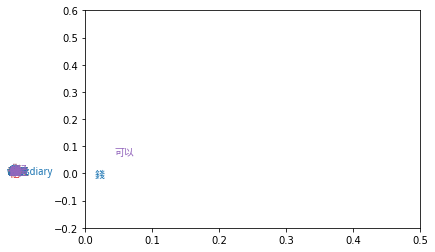

In [35]:
zhfont = matplotlib.font_manager.FontProperties(fname='/home/tp6han/gp/graguation_project/wqy-microhei.ttc')
# 畫圖
fig = plt.figure()
ax = fig.add_subplot(111)
 
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C3')
for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties = zhfont,color= 'C1')
for i in index3:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C7')
for i in index4:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C0')
for i in index5:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C4')
ax.axis([0,0.5,-0.2,0.6])
plt.figure(figsize=(60,60))
plt.show()